# import

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

import matplotlib.pyplot as plt
plt.ion()

In [2]:
df1 = pd.read_csv("fashion-mnist-train-1.csv")
df2 = pd.read_csv("fashion-mnist-train-2.csv")

In [3]:
print(df1.shape)
print(df2.shape)

(14999, 785)
(29999, 785)


In [4]:
df = df1.append(df2, ignore_index=True)

C:\Users\jb\AppData\Local\Temp\ipykernel_20900\1593761221.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2, ignore_index=True)


In [5]:
y = list(df["label"])
x = df.drop("label", axis=1)

In [6]:
x = np.array(x)

In [7]:
x.shape

(44998, 784)

In [8]:
def convert_to_images(data):
    data = np.array(data)
    data = data.reshape(-1, 28, 28, 1)
    return data

In [9]:
x = convert_to_images(x)
print(x.shape) # (44998, 28, 28, 1)

(44998, 28, 28, 1)


In [10]:
x.shape

(44998, 28, 28, 1)

In [11]:
id2class = {0: "T-shirt/top",
            1: "Trouser",
            2: "Pullover",
            3: "Dress",
            4: "Coat",
            5: "Sandal",
            6: "Shirt",
            7: "Sneaker",
            8: "Bag",
            9: "Ankle boot",}

In [12]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

train_size = int(len(x) * 0.8)
test_size = len(x) - train_size

print(train_size)
print(test_size)

# the data, split between train and test sets
x_train, x_test = x[0:train_size], x[train_size:len(x)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

#(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_test_inf, y_test_inf = x_test.copy(), y_test.copy()

35998
9000


In [13]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

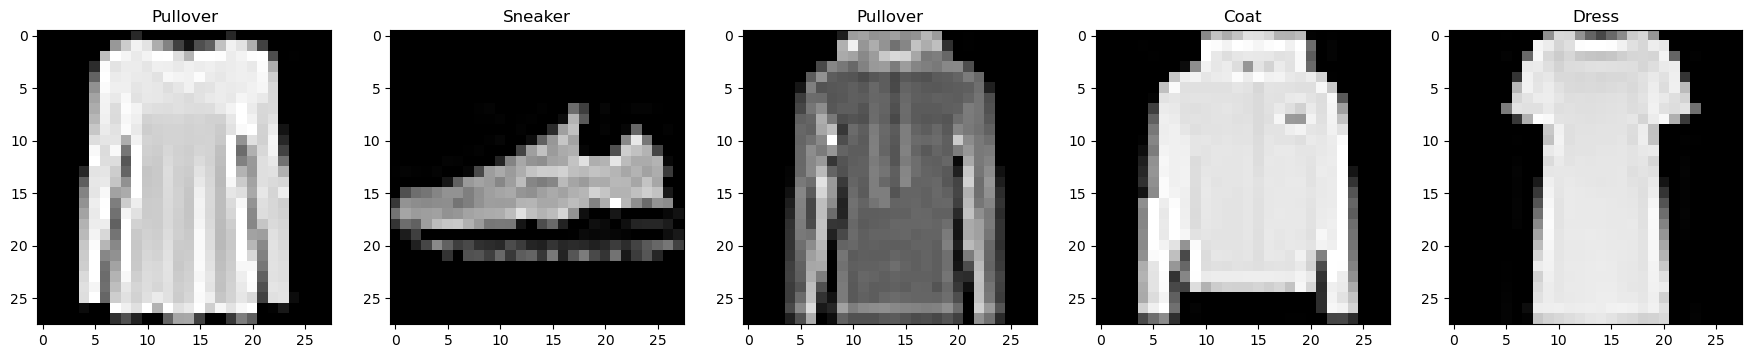

In [14]:
idx = np.random.randint(0, high=len(x_train), size=5)
figs, axes = plt.subplots(ncols=5, figsize=(22, 4))
for ax, i in zip(axes, idx): 
    ax.imshow(x_train[i], cmap='gray');
    ax.set_title(id2class[y_train[i]])

In [15]:
# Scale images to the [0, 1] range
x_train = x_train / 255
x_test = x_test.astype("float32") / 255

In [16]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (35998, 28, 28, 1)
y_train shape: (35998,)
35998 train samples
9000 test samples


# create model

In [40]:
model = keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=input_shape)) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

In [44]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',

             metrics=['accuracy'])
model.fit(x_train,
         y_train,
        
         epochs=10)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\jb\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\jb\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\jb\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\jb\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\jb\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\jb\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\jb\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\jb\anaconda3\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\jb\anaconda3\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\jb\anaconda3\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [34]:
model = keras . Sequential ([ 
    keras.layers.Flatten ( input_shape =input_shape ) , 
    keras.layers.Dense (254 , activation ='relu') ,
    keras.layers.Dense (10 , activation ='softmax') ])

model.compile(  optimizer ='adam',
                loss ='sparse_categorical_crossentropy',
                metrics =[ 'accuracy'])

model.fit(x_train , y_train , epochs = 1)

1125/1125 [==============================] - 5s 4ms/step - loss: 0.0299 - accuracy: 0.9912


In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.0742292404174805
Test accuracy: 0.8786666393280029


# save

In [36]:
model.save("fashion_mnist_V3.h5")

# predict

In [22]:
idx = 12

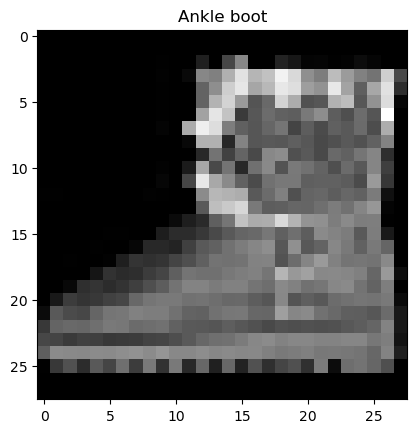

In [23]:
im = x_train[idx]

im = im.reshape(28, 28,1)

plt.imshow(im, cmap="gray")

plt.title(id2class[y_train[idx]]);

In [24]:
im = im.astype("float32") / 255

im = np.expand_dims(im, -1)[None]

im.shape

(1, 28, 28, 1, 1)

In [25]:
f"Predicted Class: {id2class[np.argmax(model.predict(im))]}"

1/1 [==============================] - 0s 62ms/step


'Predicted Class: Sandal'

In [26]:
#print(x_test_inf[idx].tolist())

# try API

In [27]:
import requests
import json

idx = 12
im = x_test_inf[idx].tolist()

data = {'image': im}
URL = 'http://90.3.11.174:5000/classify'

result = requests.post(URL, json.dumps(data))
print(f"Prediction = {result.text}")
print(f"label = {id2class[y_test_inf[idx]]}")

Prediction = Coat
label = Coat


In [28]:
import requests
import json

idx = 12
im = x_test_inf[idx].tolist()

data = {'image': im}
URL = 'http://172.17.0.2:5000/classify'

result = requests.post(URL, json.dumps(data))
print(f"Prediction = {result.text}")
print(f"label = {id2class[y_test_inf[idx]]}")

KeyboardInterrupt: 

In [29]:

        
import requests
import json

idx = 12
im = x_test_inf[idx].tolist()

data = {'image': im}
URL = 'http://127.0.0.1:5000/predict'

result = requests.post(URL, json.dumps(data))
print(f"Prediction = {result.text}")
print(f"label = {id2class[y_test_inf[idx]]}")

Prediction = Coat
label = Coat
